In [19]:
from pathlib import Path
from models.transfersdataset import TransfersDataset
from models.xgboost import Xgboost
import numpy as np

In [12]:
td = TransfersDataset(Path.cwd()/'../prepped/final.csv')
td.encode_last_positions()
td.encode()
td.drop()

/Users/timurkambachekov/вышка/4 курс/вкр/project/ml/models/transfersdataset.py:8: DtypeWarning:

Columns (38,59,75,88,92,103,149,170,186,199,203,214,260,281,297,310,314,325,371,392,408,421,425,436,704,725,741,754,758,769,815,836,852,865,869,880,926,947,963,976,980,991,1037,1058,1074,1087,1091,1102) have mixed types. Specify dtype option on import or set low_memory=False.



Target propositions:

- Market Value at the end of the season (marketval_0)
- Difference between market values at the end of next and previous seasons (marketval_0 - marketval_-1)
- Age adjusted market value differences

# Target - Market Value

In [13]:
m = Xgboost(
    target = 'marketval_0',
    features = ['age', 'season', 'window', 'loan', 'club_from_elo', 'club_to_elo', 'league_from_elo', 'league_to_elo'] + \
               td.data.columns[td.data.columns.str.contains('pos')].tolist() + \
               td.data.columns[td.data.columns.str.contains('_-')].tolist(),
    data = td.data
)
m.train_test_split()
m.scale()
# m.tune_hp()
m.train()
m.inverse_scale()
m.feature_importance()
m.mae()
m.mape()
m.plot_predictions()

MAE = 4313909.2125
MAPE = 0.6360048142749289


In [14]:
m.top_n_predictions(20)

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,marketval_-1,marketval_0,fee,loan,marketval_0,marketval_0_pred,error
1629,C. Dagba,23,22/23,France,Ligue 1,Paris Saint-Germain,France,Ligue 1,Strasbourg,1,7000000.0,4500000.0,0.0,1,4500000.0,4489505.50,10494.50
2116,C. Okoli,22,23/24,Italy,Serie A,Atalanta,Italy,Serie A,Frosinone,1,10000000.0,8000000.0,100000.0,1,8000000.0,8042029.00,42029.00
242,J. Schmid,29,19/20,Germany,Bundesliga,Augsburg,Germany,Bundesliga,Freiburg,1,5000000.0,4000000.0,4000000.0,0,4000000.0,4062671.75,62671.75
1532,J. Clauss,29,22/23,France,Ligue 1,Lens,France,Ligue 1,Olympique Marseille,1,15000000.0,14000000.0,7500000.0,0,14000000.0,14086317.00,86317.00
207,R. Ghezzal,27,19/20,England,Premier League,Leicester City,Italy,Serie A,Fiorentina,1,8000000.0,5500000.0,0.0,1,5500000.0,5635418.00,135418.00
404,E. Can,26,19/20,Italy,Serie A,Juventus,Germany,Bundesliga,Borussia Dortmund,0,40000000.0,24000000.0,1000000.0,1,24000000.0,24161164.00,161164.00
293,Jaume Costa,31,19/20,Spain,LaLiga,Villarreal,Spain,LaLiga,Valencia,1,4000000.0,3200000.0,0.0,1,3200000.0,3365233.75,165233.75
133,Pol Lirola,21,19/20,Italy,Serie A,Sassuolo,Italy,Serie A,Fiorentina,1,13000000.0,9500000.0,2000000.0,1,9500000.0,9234662.00,265338.00
451,Bryan Gil,18,19/20,Spain,LaLiga,Sevilla,Spain,LaLiga,Leganés,0,10000000.0,9000000.0,0.0,1,9000000.0,9282860.00,282860.00
1218,N. de Préville,30,21/22,France,Ligue 1,Bordeaux,France,Ligue 1,Metz,1,3000000.0,2500000.0,0.0,0,2500000.0,2801774.75,301774.75


In [15]:
m.top_n_predictions(20, worst=True)

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,marketval_-1,marketval_0,fee,loan,marketval_0,marketval_0_pred,error
547,W. Fofana,19,20/21,France,Ligue 1,Saint-Étienne,England,Premier League,Leicester City,1,5400000.0,40000000.0,35000000.0,0,40000000.0,10909535.0,29090465.0
1425,O. Zinchenko,25,22/23,England,Premier League,Manchester City,England,Premier League,Arsenal,1,25000000.0,42000000.0,35000000.0,0,42000000.0,17283800.0,24716200.0
541,Diogo Jota,23,20/21,England,Premier League,Wolverhampton Wanderers,England,Premier League,Liverpool,1,28000000.0,45000000.0,44700000.0,0,45000000.0,24611386.0,20388614.0
1293,Bruno Guimarães,24,21/22,France,Ligue 1,Olympique Lyonnais,England,Premier League,Newcastle United,0,30000000.0,40000000.0,42100000.0,0,40000000.0,20690110.0,19309890.0
1980,L. Openda,23,23/24,France,Ligue 1,Lens,Germany,Bundesliga,RB Leipzig,1,35000000.0,55000000.0,38500000.0,0,55000000.0,35887444.0,19112556.0
959,J. Grealish,25,21/22,England,Premier League,Aston Villa,England,Premier League,Manchester City,1,65000000.0,70000000.0,117500000.0,0,70000000.0,51447404.0,18552596.0
1865,J. Kiwior,22,22/23,Italy,Serie A,Spezia,England,Premier League,Arsenal,0,3000000.0,25000000.0,19500000.0,0,25000000.0,8231176.5,16768823.5
1296,A. Martial,26,21/22,England,Premier League,Manchester United,Spain,LaLiga,Sevilla,0,45000000.0,16000000.0,0.0,1,16000000.0,31364516.0,15364516.0
79,T. Mings,26,19/20,England,Premier League,Bournemouth,England,Premier League,Aston Villa,1,5000000.0,22500000.0,22300000.0,0,22500000.0,7230766.5,15269233.5
1954,K. Havertz,24,23/24,England,Premier League,Chelsea,England,Premier League,Arsenal,1,55000000.0,55000000.0,75000000.0,0,55000000.0,39985540.0,15014460.0


In [16]:
m.calculate_effectiveness()

In [26]:
m.predictions[m.predictions.loan == 0].sort_values('eff_pred', ascending=False).dropna()

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,...,marketval_0,fee,loan,marketval_0,marketval_0_pred,error,age_coef,inflation,eff_true,eff_pred
116,R. Fredericks,29,22/23,England,Premier League,West Ham United,England,Premier League,Bournemouth,1,...,1500000.0,0.0,0,1500000.0,5390295.00,3890295.00,1.013634,0.194958,0.424129,1.524122
203,Dani Raba,26,21/22,Spain,LaLiga,Villarreal,Spain,LaLiga,Granada,0,...,900000.0,0.0,0,900000.0,4009211.75,3109211.75,0.787918,0.199843,0.328342,1.462659
142,J. Sala,27,19/20,Italy,Serie A,Sampdoria,Italy,Serie A,SPAL,1,...,1200000.0,0.0,0,1200000.0,3853813.75,2653813.75,0.866515,-0.078351,0.352567,1.132274
31,Mexer,30,19/20,France,Ligue 1,Rennes,France,Ligue 1,Bordeaux,1,...,3200000.0,0.0,0,3200000.0,7222143.00,4022143.00,1.116962,-0.078351,0.484767,1.094080
107,E. Choupo-Moting,31,20/21,France,Ligue 1,Paris Saint-Germain,Germany,Bundesliga,Bayern München,1,...,3500000.0,0.0,0,3500000.0,5266614.00,1766614.00,1.196456,-0.233083,0.682537,1.027046
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77,T. Mings,26,19/20,England,Premier League,Bournemouth,England,Premier League,Aston Villa,1,...,22500000.0,22300000.0,0,22500000.0,7230766.50,15269233.50,0.787918,-0.078351,-0.306475,-1.611842
188,J. Kiwior,22,22/23,Italy,Serie A,Spezia,England,Premier League,Arsenal,0,...,25000000.0,19500000.0,0,25000000.0,8231176.50,16768823.50,0.531726,0.194958,-1.395941,-2.639557
114,W. Fofana,19,20/21,France,Ligue 1,Saint-Étienne,England,Premier League,Leicester City,1,...,40000000.0,35000000.0,0,40000000.0,10909535.00,29090465.00,0.326293,-0.233083,-1.664959,-2.810965
37,Pedro Neto,19,19/20,Italy,Serie A,Lazio,England,Premier League,Wolverhampton Wanderers,1,...,15000000.0,17900000.0,0,15000000.0,7562314.00,7437686.00,0.326293,-0.078351,-2.517904,-3.044540


In [25]:
m.predictions[m.predictions.loan == 0].sort_values('eff_true', ascending=False).dropna()

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,...,marketval_0,fee,loan,marketval_0,marketval_0_pred,error,age_coef,inflation,eff_true,eff_pred
22,A. Witsel,33,22/23,Germany,Bundesliga,Borussia Dortmund,Spain,LaLiga,Atlético Madrid,1,...,5000000.0,0.0,0,5000000.0,3555367.75,1444632.25,1.397068,0.194958,0.730710,0.519588
107,E. Choupo-Moting,31,20/21,France,Ligue 1,Paris Saint-Germain,Germany,Bundesliga,Bayern München,1,...,3500000.0,0.0,0,3500000.0,5266614.00,1766614.00,1.196456,-0.233083,0.682537,1.027046
68,A. Sánchez,33,22/23,Italy,Serie A,Inter Milan,France,Ligue 1,Olympique Marseille,1,...,4000000.0,0.0,0,4000000.0,2798988.75,1201011.25,1.397068,0.194958,0.668077,0.467485
58,M. Vecino,30,22/23,Italy,Serie A,Inter Milan,Italy,Serie A,Lazio,1,...,4500000.0,0.0,0,4500000.0,3500965.75,999034.25,1.116962,0.194958,0.600897,0.467493
89,G. Escalante,27,20/21,Spain,LaLiga,Eibar,Italy,Serie A,Lazio,1,...,3200000.0,0.0,0,3200000.0,4499414.50,1299414.50,0.866515,-0.233083,0.564934,0.794335
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
221,A. Gordon,21,22/23,England,Premier League,Everton,England,Premier League,Newcastle United,0,...,38000000.0,45600000.0,0,38000000.0,24262966.00,13737034.00,0.451151,0.194958,-0.781332,-0.910991
188,J. Kiwior,22,22/23,Italy,Serie A,Spezia,England,Premier League,Arsenal,0,...,25000000.0,19500000.0,0,25000000.0,8231176.50,16768823.50,0.531726,0.194958,-1.395941,-2.639557
114,W. Fofana,19,20/21,France,Ligue 1,Saint-Étienne,England,Premier League,Leicester City,1,...,40000000.0,35000000.0,0,40000000.0,10909535.00,29090465.00,0.326293,-0.233083,-1.664959,-2.810965
37,Pedro Neto,19,19/20,Italy,Serie A,Lazio,England,Premier League,Wolverhampton Wanderers,1,...,15000000.0,17900000.0,0,15000000.0,7562314.00,7437686.00,0.326293,-0.078351,-2.517904,-3.044540


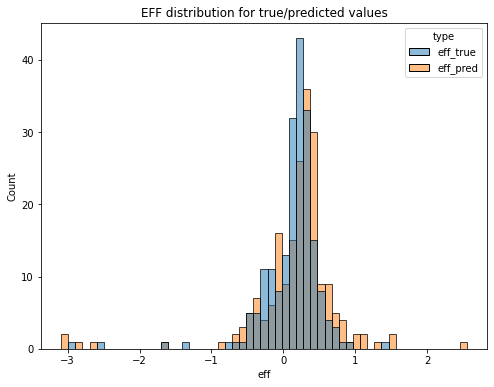

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt
eff = m.predictions[['eff_true', 'eff_pred']]
eff = eff.stack().reset_index(level=1).reset_index(drop=True)
eff.columns = ['type', 'eff']
plt.figure(figsize=(8, 6))
sns.histplot(eff, x='eff', hue='type')
plt.title('EFF distribution for true/predicted values')
plt.show()

,level_1,0
0,eff_true,0.228227
0,eff_pred,0.344470
1,eff_true,0.339561
1,eff_pred,0.471970
4,eff_true,0.141630
...,...,...
237,eff_pred,-0.451757
238,eff_true,0.298904
238,eff_pred,0.639957
239,eff_true,0.250313


In [22]:
m.predictions.eff_pred.corr(m.predictions.eff_true)

0.8498265663870479

In [18]:
raise

RuntimeError: No active exception to reraise

# Target - Market Value difference 

In [ ]:
td.data['marketval_diff'] = td.data.marketval_0 - td.data['marketval_-1']
td.data['marketval_diff']

0              NaN
1      -34000000.0
2      -34000000.0
3        6000000.0
4              NaN
           ...    
2459           NaN
2460           NaN
2461           NaN
2462           NaN
2463           NaN
Name: marketval_diff, Length: 2464, dtype: float64

In [ ]:
m = Xgboost(
    target = 'marketval_diff',
    features = ['age', 'season', 'window', 'loan', 'club_from_elo', 'club_to_elo', 'league_from_elo', 'league_to_elo'] + \
               td.data.columns[td.data.columns.str.contains('pos')].tolist() + \
               td.data.columns[td.data.columns.str.contains('_-')].tolist(),
    data = td.data
)
m.train_test_split()
m.scale()
# m.tune_hp()
m.train()
m.inverse_scale()
m.mae()
m.mape()
m.plot_predictions()

MAE = 4631744.615364583
MAPE = 1.0977536312420823e+21


In [ ]:
m.top_n_predictions(20, worst=True)

,name,age,season,country_from,league_from,club_from,country_to,league_to,club_to,window,marketval_-1,marketval_0,fee,loan,marketval_diff,marketval_diff_pred,error
547,W. Fofana,19,20/21,France,Ligue 1,Saint-Étienne,England,Premier League,Leicester City,1,5400000.0,40000000.0,35000000.0,0,34600000.0,-64147.00,34664147.00
1980,L. Openda,23,23/24,France,Ligue 1,Lens,Germany,Bundesliga,RB Leipzig,1,35000000.0,55000000.0,38500000.0,0,20000000.0,-11975160.00,31975160.00
1296,A. Martial,26,21/22,England,Premier League,Manchester United,Spain,LaLiga,Sevilla,0,45000000.0,16000000.0,0.0,1,-29000000.0,-5714967.00,23285033.00
1425,O. Zinchenko,25,22/23,England,Premier League,Manchester City,England,Premier League,Arsenal,1,25000000.0,42000000.0,35000000.0,0,17000000.0,-4871978.50,21871978.50
541,Diogo Jota,23,20/21,England,Premier League,Wolverhampton Wanderers,England,Premier League,Liverpool,1,28000000.0,45000000.0,44700000.0,0,17000000.0,-4549457.50,21549457.50
991,C. Romero,23,21/22,Italy,Serie A,Atalanta,England,Premier League,Tottenham Hotspur,1,35000000.0,48000000.0,0.0,1,13000000.0,-7854176.00,20854176.00
1865,J. Kiwior,22,22/23,Italy,Serie A,Spezia,England,Premier League,Arsenal,0,3000000.0,25000000.0,19500000.0,0,22000000.0,2875687.75,19124312.25
1293,Bruno Guimarães,24,21/22,France,Ligue 1,Olympique Lyonnais,England,Premier League,Newcastle United,0,30000000.0,40000000.0,42100000.0,0,10000000.0,-6393832.00,16393832.00
597,Raphinha,23,20/21,France,Ligue 1,Rennes,England,Premier League,Leeds United,1,16000000.0,30000000.0,18600000.0,0,14000000.0,-2010493.00,16010493.00
32,Joelinton,22,19/20,Germany,Bundesliga,Hoffenheim,England,Premier League,Newcastle United,1,35000000.0,20000000.0,43500000.0,0,-15000000.0,957642.50,15957642.50
